In [2]:
import sqlite3
import pandas as pd

# Step 1: Connect to your SQLite database
db_path = r"C:\Users\Jayanth\OneDrive - The Pennsylvania State University\Desktop\Visual\Python statistics\sqllite.db"
conn = sqlite3.connect(db_path)

# Step 2: Read the hospital table into a DataFrame
df = pd.read_sql_query("SELECT * FROM hospital", conn)
print("Original data:")
print(df.head())



Original data:
  patient_id   age  gender blood_pressure  cholesterol   bmi diabetes  \
0          2  46.0  Female         120/92        292.0  36.3       No   
1          3  89.0   Other         135/78        153.0  30.3       No   
2          4  84.0  Female         123/80        153.0  31.5       No   
3          5  32.0   Other         135/84        205.0  18.4       No   
4          6  75.0  Female        139/100        194.0  33.5       No   

  hypertension  medication_count  length_of_stay discharge_destination  \
0           No               4.0             3.0      Nursing_Facility   
1          Yes               1.0             1.0                  Home   
2          Yes               3.0            10.0                  Home   
3          Yes               6.0             4.0      Nursing_Facility   
4          Yes               0.0            10.0                  Home   

  readmitted_30_days  LOS_Double  LOS_GT_5  Senior_LongStay  BitwiseDemo  \
0                 No     

In [ ]:
df.to_csv('cleaned.csv', index=False)

In [3]:
# prompt: read csv file

import pandas as pd
# read the CSV file into a DataFrame
df= pd.read_csv('cleaned.csv')


In [4]:
# Goal: How variables move together.

# Covariance Matrix
import pandas as pd
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns
cov_matrix = df[num_cols].cov()

print(cov_matrix)


                           age  cholesterol         bmi  medication_count  \
age                 443.363302    -4.766383    1.219511          0.131270   
cholesterol          -4.766383  1899.703475   -1.157987         -0.081394   
bmi                   1.219511    -1.157987   40.299475          0.122332   
medication_count      0.131270    -0.081394    0.122332         10.026318   
length_of_stay        0.002972     0.343980   -0.028031          0.077134   
LOS_Double            0.005944     0.687960   -0.056062          0.154269   
LOS_GT_5              0.003431     0.006567    0.000356          0.011506   
Senior_LongStay       2.621459    -0.036023    0.012882         -0.000824   
BitwiseDemo           0.130764    -0.114394   -0.005824         -0.009740   
IsHomeDischarge       0.040458    -0.042087   -0.000486         -0.002996   
AgeSquared        47832.261910  -762.557359  154.518578         26.136491   

                  length_of_stay  LOS_Double  LOS_GT_5  Senior_LongStay  \


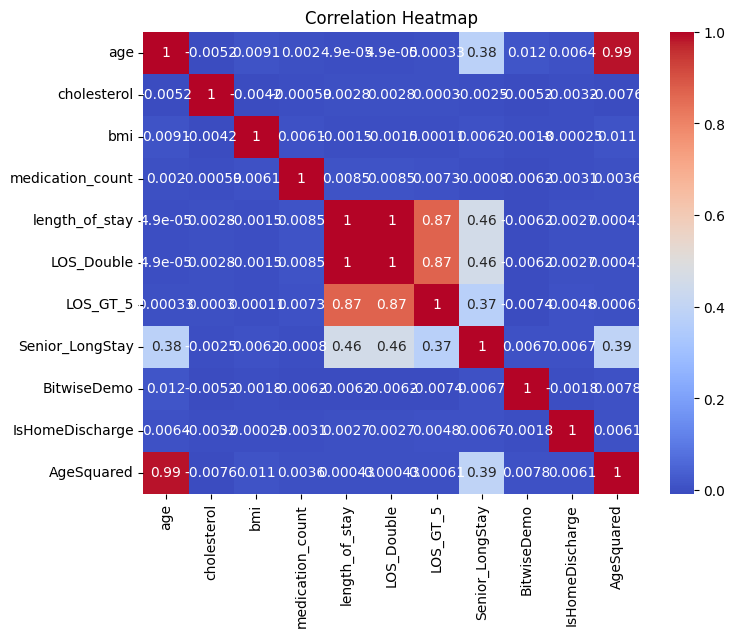

In [5]:
# Correlation Matrix
corr_matrix = df[num_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Is diabetes associated with readmission?

Test: Chi-square test

In [6]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['diabetes'], df['readmitted_30_days'])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi2:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Significant association")
else:
    print("❌ No significant association")


Chi2: 25.864090984574197
p-value: 3.663207316663771e-07
✅ Significant association


Does length of stay depend on age?

Test: Regression or correlation; broader than correlation alone.

In [7]:
from scipy.stats import linregress

result = linregress(df['age'], df['length_of_stay'])
print(f"Slope: {result.slope}")
print(f"p-value: {result.pvalue}")

if result.pvalue < 0.05:
    print("✅ Significant dependence")
else:
    print("❌ No significant dependence")


Slope: nan
p-value: nan
❌ No significant dependence


In [8]:
correlation = df['age'].corr(df['length_of_stay'])

print(f"Correlation between Age and Stay: {correlation}")

Correlation between Age and Stay: 4.922659657862389e-05


From the above results, we can say that age has some type of dependence on length of stay but the relationship very weak such that it is negligible.

Simpson's Paradox - Check whether a relationship flips when split by a subgroup.

Is average length of stay higher for diabetics overall, but lower within genders?

According to the results we observe same pattern holds i.e patients with diabetes have lower length of stay but in the case of paradox it completely reverses.

In [9]:
# Overall
overall = df.groupby('diabetes')['length_of_stay'].mean()
print("Overall mean LOS by diabetes:\n", overall)

# Subgrouped by gender
by_gender = df.groupby(['diabetes', 'gender'])['length_of_stay'].mean()
print("\nMean LOS by diabetes and gender:\n", by_gender)


Overall mean LOS by diabetes:
 diabetes
No     5.512125
Yes    5.493912
Name: length_of_stay, dtype: float64

Mean LOS by diabetes and gender:
 diabetes  gender
No        Female    5.509602
          Flu            NaN
          Male      5.531066
          Other     5.495417
Yes       Female    5.477291
          Male      5.529236
          Other     5.474925
Name: length_of_stay, dtype: float64


In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X_scaled = StandardScaler().fit_transform(X_clean)

kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

print(df_clean['KMeans_Cluster'].value_counts())


KMeans_Cluster
0    14491
2     8564
1     6944
Name: count, dtype: int64


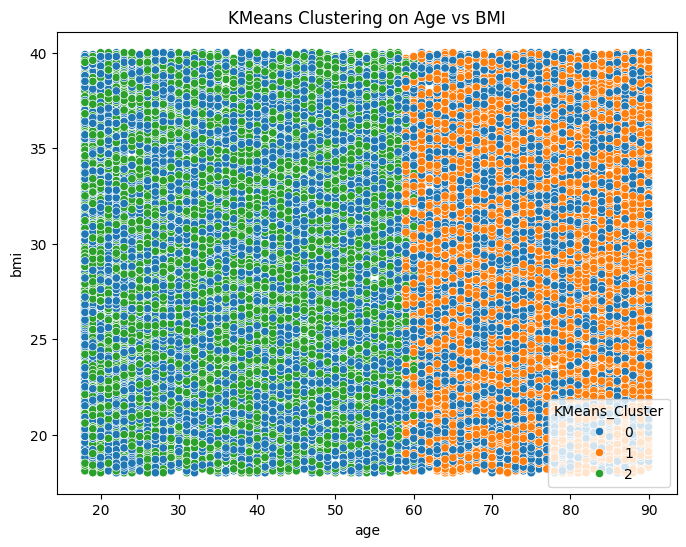

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='age', y='bmi', hue='KMeans_Cluster', palette='tab10')
plt.title("KMeans Clustering on Age vs BMI")
plt.show()


In [16]:
cluster_profile = df_clean.groupby('KMeans_Cluster').mean(numeric_only=True)
print(cluster_profile)


                      age  cholesterol        bmi  medication_count  \
KMeans_Cluster                                                        
0               52.794286   225.399075  28.947485          5.029812   
1               75.485023   224.499856  28.953053          5.005184   
2               38.211467   225.640705  28.938393          4.988323   

                length_of_stay  LOS_Double  LOS_GT_5  Senior_LongStay  \
KMeans_Cluster                                                          
0                     8.061348   16.122697  1.000000         0.251604   
1                     3.259217    6.518433  0.071285         0.000000   
2                     2.993578    5.987156  0.000000         0.000000   

                BitwiseDemo  IsHomeDischarge   AgeSquared  
KMeans_Cluster                                             
0                  0.487889         0.900145  3209.760955  
1                  0.513537         0.903946  5783.869528  
2                  0.482602         0.

| Cluster | Description                               | Count  | Key Characteristics                                                                                                                                                                                  |
| ------- | ----------------------------------------- | ------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **0**   | **Middle-aged, Long Stay**                | 14,491 | - **Age:** \~53 <br> - **LOS:** **8.06 days** (longest) <br> - **Senior\_LongStay:** 25% <br> - Balanced group, moderately high home discharge (90%)                                                 |
| **1**   | **Elderly, Short Stay but High Age Risk** | 6,944  | - **Age:** **75.48** <br> - **LOS:** **3.25 days** (short) <br> - **Senior\_LongStay:** **0%** but **high age** <br> - Home discharge: 90% <br> - Highest age squared (5783) but not the highest LOS |
| **2**   | **Young, Short Stay, Low Risk**           | 8,564  | - **Age:** **38.21** <br> - **LOS:** **2.99 days** (shortest) <br> - **Senior\_LongStay:** **0%** <br> - Home discharge: 89% <br> - Generally lower clinical risk                                    |


In [10]:
X = df[num_cols]

In [12]:
X_clean = X.dropna()


In [14]:
df_clean = df.loc[X_clean.index]

In [17]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
df_clean['GMM_Cluster'] = gmm.fit_predict(X_scaled)

print(df_clean['GMM_Cluster'].value_counts())


GMM_Cluster
2    15013
1    11340
0     3646
Name: count, dtype: int64


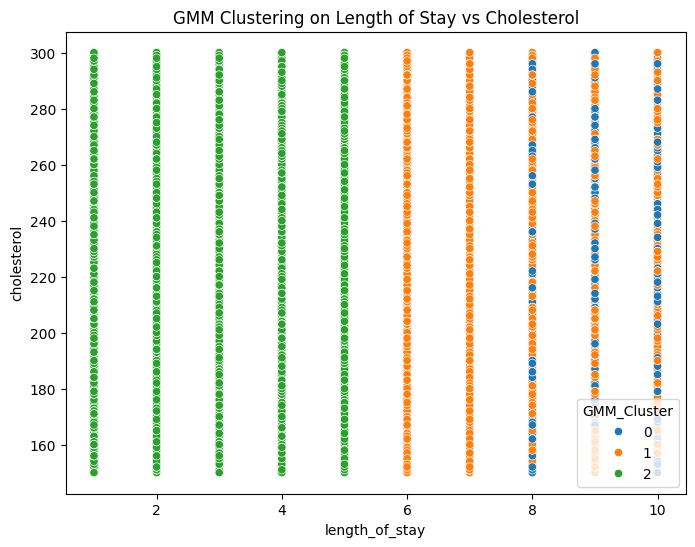

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='length_of_stay', y='cholesterol', hue='GMM_Cluster', palette='tab10')
plt.title("GMM Clustering on Length of Stay vs Cholesterol")
plt.show()


In [25]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
df_clean['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

print(df_clean['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
 5     6792
 1     6685
 6     5260
 4     4938
 2     1650
 3     1648
 0      774
 9      762
 8      586
 10     556
 7      179
 11     168
-1        1
Name: count, dtype: int64


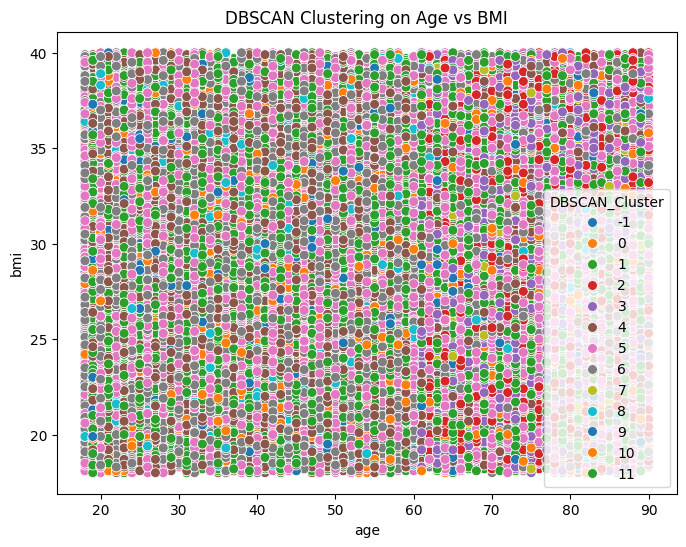

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='age', y='bmi', hue='DBSCAN_Cluster', palette='tab10', s=50)
plt.title("DBSCAN Clustering on Age vs BMI")
plt.show()


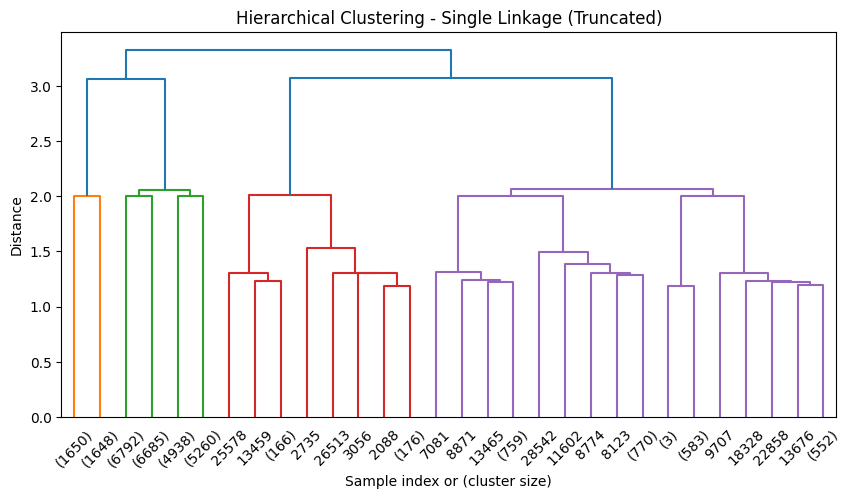

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_scaled, method='single')

plt.figure(figsize=(10, 5))
# Truncate the dendrogram to show only the last p merges
dendrogram(linked, truncate_mode='lastp', p=30) # Adjust p as needed to control the number of clusters shown
plt.title('Hierarchical Clustering - Single Linkage (Truncated)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

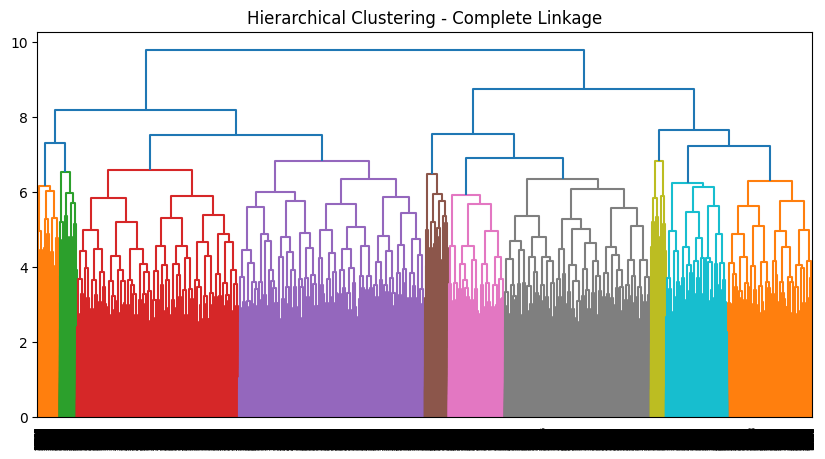

In [21]:
linked = linkage(X_scaled, method='complete')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Hierarchical Clustering - Complete Linkage')
plt.show()


In [29]:
# Parametric Testing - 
from scipy.stats import ttest_ind

male_bmi = df_clean[df_clean['gender']=='Male']['bmi']
female_bmi = df_clean[df_clean['gender']=='Female']['bmi']

t_stat, p = ttest_ind(male_bmi, female_bmi)
print(f"T-Statistic={t_stat}, p-value={p}")


T-Statistic=0.7460973443444283, p-value=0.4556173940161974


as we can see the p value is greater than the 0.05(alpha value) so there is no significant difference in BMI between genders. Positive t-stat → Group A (Males) has a higher mean BMI than Group B (Females). we can also verify the difference between two variables by calculating the t critical value if the t stat value is greater than the t critical then we can say they are significanlty different.


In [30]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(male_bmi, female_bmi)
print(f"Statistic={stat}, p-value={p}")


Statistic=50181059.0, p-value=0.45132742905255907


In case of smaller sample data we calculate Ucritical and compare the statistics value to see if there is difference between two variables but in the case of larger samples similar to t test we use p value to check whether it is < 0.05(significance level) if it is we can they are significanlty different with a 95% confidence.

Compare readmission rates between patients with and without hypertension.

In [32]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 5.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.9 MB 5.0 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.9 MB 5.4 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.9 MB 5.4 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.9 MB 5.6 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.9 MB 5.6 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.9 MB 5.5 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.9 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 4.6 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   -----------------------------------

In [33]:
from statsmodels.stats.proportion import proportions_ztest

count = [df_clean[df_clean['hypertension']=='Yes']['readmitted_30_days'].value_counts().get('Yes', 0),
         df_clean[df_clean['hypertension']=='No']['readmitted_30_days'].value_counts().get('Yes', 0)]

nobs = [df_clean[df_clean['hypertension']=='Yes'].shape[0],
        df_clean[df_clean['hypertension']=='No'].shape[0]]

stat, p = proportions_ztest(count, nobs)
print(f"Z-Statistic={stat}, p-value={p}")


Z-Statistic=3.9149087047945597, p-value=9.043842164197417e-05


In [34]:
rate_with_hypertension = count[0] / nobs[0]
rate_without_hypertension = count[1] / nobs[1]
print(rate_with_hypertension, rate_without_hypertension)


0.12985712378154626 0.11503894547633313


Since the p-value < 0.05, you reject the null hypothesis. This means there is a statistically significant difference in readmission rates between patients with hypertension and those without hypertension. 
Patients with hypertension are significantly more (or less) likely to be readmitted within 30 days compared to patients without hypertension. 
The Z-statistic is positive (3.91), which suggests that the proportion in group A (likely the hypertensive patients) is higher than in group B (non-hypertensive patients).

In [35]:
def calc_woe_iv(df, feature, target):
    lst = []

    for val in df[feature].unique():
        total = df[df[feature]==val].shape[0]
        event = df[(df[feature]==val) & (df[target]==1)].shape[0]
        non_event = total - event
        lst.append([val, total, event, non_event])

    data = pd.DataFrame(lst, columns=['Value', 'Total', 'Event', 'Non_Event'])
    data['Event_Rate'] = data['Event'] / data['Event'].sum()
    data['Non_Event_Rate'] = data['Non_Event'] / data['Non_Event'].sum()
    data['WOE'] = np.log(data['Event_Rate'] / data['Non_Event_Rate'])
    data['IV'] = (data['Event_Rate'] - data['Non_Event_Rate']) * data['WOE']

    iv = data['IV'].sum()
    return data, iv

df_temp = df_clean.copy()
df_temp['target'] = df_temp['readmitted_30_days'].map({'Yes':1, 'No':0})

woe_table, iv = calc_woe_iv(df_temp, 'diabetes', 'target')
print(woe_table)
print(f"Information Value (IV) = {iv}")


  Value  Total  Event  Non_Event  Event_Rate  Non_Event_Rate       WOE  \
0    No  15051   1698      13353    0.462292        0.507217 -0.092742   
1   Yes  14948   1975      12973    0.537708        0.492783  0.087246   

         IV  
0  0.004166  
1  0.003920  
Information Value (IV) = 0.00808592927527305


total - Total number of rows for this category (val).
event - Number of events (e.g., readmitted = 1).
non event - Number of non-events (not readmitted = 0).

WOE compares the rate of events vs. non-events for each category.
WOE for No = -0.0927
→ Patients without diabetes are slightly less likely to be readmitted compared to the overall population.

WOE for Yes = 0.0872
→ Patients with diabetes are slightly more likely to be readmitted than average.

Positive WOE → higher event likelihood (here, readmission).
Negative WOE → lower event likelihood compared to overall.

Diabetes as a variable has very weak predictive power for whether a patient gets readmitted within 30 days in your dataset. Beacuse IV < 0.02 which is very weak.


Predict length_of_stay based on age, bmi, medication_count. - Linear Regression (Predicts a numeric outcome.)

In [36]:
import statsmodels.api as sm

X = df_clean[['age', 'bmi', 'medication_count']]
y = df_clean['length_of_stay']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         length_of_stay   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7471
Date:                Mon, 30 Jun 2025   Prob (F-statistic):              0.524
Time:                        10:56:18   Log-Likelihood:                -74164.
No. Observations:               29999   AIC:                         1.483e+05
Df Residuals:                   29995   BIC:                         1.484e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4849      0.091  

The selected predictors (age, bmi, medication_count) have very weak or no linear relationship with length_of_stay. Because Low R², all variables are statistically insignificant (p > 0.05).

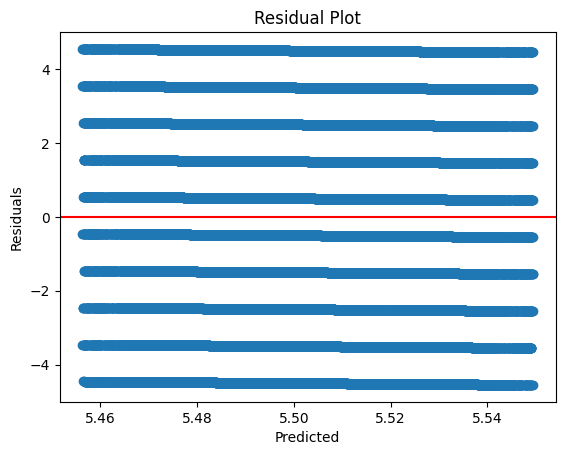

In [37]:
import matplotlib.pyplot as plt

y_pred = model.predict(X)
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


This model is essentially a flat line — it predicts the mean length_of_stay for all patients, ignoring the input features because those features don't explain any variation in the target.

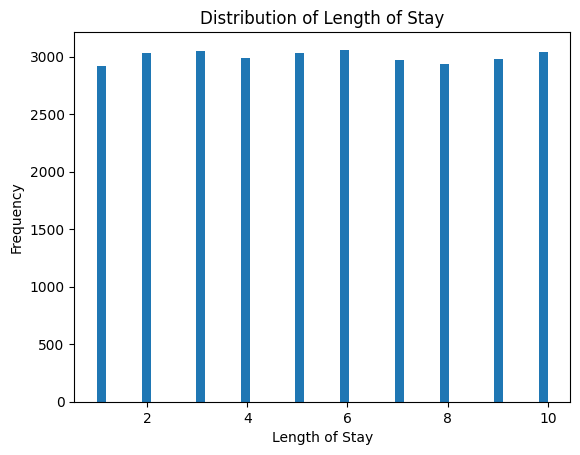

In [38]:
import matplotlib.pyplot as plt

plt.hist(df_clean['length_of_stay'], bins=50)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Frequency')
plt.show()


In [39]:
from sklearn.linear_model import LogisticRegression

X = df_clean[['age', 'bmi', 'medication_count']]
y = df_clean['readmitted_30_days'].map({'Yes':1, 'No':0})

log_reg = LogisticRegression()
log_reg.fit(X, y)

print("Coefficients:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)


Coefficients: [[ 6.88172310e-05 -6.49687544e-03 -1.93050691e-05]]
Intercept: [-1.785756]


In [40]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = log_reg.predict(X)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))



[[26326     0]
 [ 3673     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     26326
           1       0.00      0.00      0.00      3673

    accuracy                           0.88     29999
   macro avg       0.44      0.50      0.47     29999
weighted avg       0.77      0.88      0.82     29999



c:\Users\Jayanth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Jayanth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Jayanth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

The model learns to predict the majority class to optimize accuracy but ignores the minority class (readmitted patients), which is the class you're often most interested in predicting in healthcare.

Problem of CoLinearity - When independent variables are highly correlated → unstable models. Check with Variance Inflation Factor (VIF). 

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = sm.add_constant(df_clean[['age', 'bmi', 'medication_count']])

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["Feature"] = X_vif.columns

print(vif)

         VIF           Feature
0  30.533222             const
1   1.000087               age
2   1.000120               bmi
3   1.000041  medication_count


Threshold guide:

VIF < 5 → Acceptable (no multicollinearity).

VIF > 10 → High multicollinearity — problematic.

In my case, VIF for all predictors is about 1, meaning:

The independent variables (age, bmi, medication_count) are completely independent of each other.

No redundancy in features.

This is good from a model assumptions perspective.

In [42]:
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd

# Create a binary column: 1 = Discharged Home, 0 = Otherwise
df_clean['IsHomeDischarge'] = df_clean['discharge_destination'].apply(lambda x: 1 if x == 'Home' else 0)

# Count of home discharges
count = [
    df_clean[df_clean['hypertension']=='Yes']['IsHomeDischarge'].sum(),
    df_clean[df_clean['hypertension']=='No']['IsHomeDischarge'].sum()
]

# Total number of patients in each group
nobs = [
    df_clean[df_clean['hypertension']=='Yes'].shape[0],
    df_clean[df_clean['hypertension']=='No'].shape[0]
]

# Perform Z-test for proportions
stat, pval = proportions_ztest(count, nobs)
print(f"Z-statistic = {stat:.4f}, p-value = {pval:.4f}")

if pval < 0.05:
    print("✅ Statistically significant difference in home discharge rates based on hypertension.")
else:
    print("❌ No significant difference in home discharge rates based on hypertension.")


Z-statistic = -0.8921, p-value = 0.3724
❌ No significant difference in home discharge rates based on hypertension.
